In [1]:
# Examine the upper limit of MLL=1/M**3 (M is num of grid) for step
# 0->Step, 1->Ramp
# def generate_test_spike_trains(M=20, N=400, T=100, rmin=1, rmax=100, 
#                                bmin=0, bmax=4, logsmin=0.04, logsmax=4, 
#                                mmin=0, mmax=100, xmin=0, xmax=1,
#                                model="original", GammaShape=None):

from models import *
from models2 import *
from inference import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import time
N=400 
num_grid = 10
K=20
T=100


start_time = time.time()
time_points = np.linspace(1,T,T) # 0,1,2,...
dt = 1/T
time_ms = time_points * dt * 1e3

Rh = 50

st = np.arange(K) # states
xt = st/(K-1)

start_time = time.time()

values_r = np.linspace(1, 10, num_grid)
values_m = np.linspace(0, 100, num_grid)
values_logs = np.linspace(np.log(0.04), np.log(4),num_grid) # -3.22 - 1.386
values_b = np.linspace(0, 4, num_grid)
values_x0 = np.linspace(0, 1, num_grid)

logMLRs = np.zeros((num_grid,num_grid))
ramp_MLLs = np.zeros((num_grid,num_grid))
step_MLLs = np.zeros((num_grid,num_grid))

x0=0.2
num = 0
for b_idx in range(num_grid):
    for s_idx in range(num_grid):
#         for x_idx in range(num_grid):

        
        b = values_b[b_idx]
        logs = values_logs[s_idx]
#             x0 = values_x0[x_idx]

        ramp = RampModel(beta=b, sigma=np.exp(logs), x0=x0, Rh=50)
        [ramp_spikes, _, _, _, _] = ramp.simulate_HMM(Ntrials=N, T=T, K=K, get_rate=True, GammaShape=2)
        counts_matrix= generate_psth(spike_trains=ramp_spikes, return_counts=True);
        logMLRs[b_idx,s_idx], ramp_MLLs[b_idx,s_idx], step_MLLs[b_idx,s_idx] = MLR_calculator(counts_matrix, M = num_grid, K = K, Print=True)

        end_time = time.time()
        elapsed_time = end_time - start_time
        num+=1
        print(f"{num}/{num_grid**2}, {elapsed_time} s")


Ramp marginal log-likelihood inferred： 77.77219820022583 s
Step marginal log-likelihood inferred： 13.756001949310303 s
1/100, 92.05904936790466 s
Ramp marginal log-likelihood inferred： 74.83354616165161 s
Step marginal log-likelihood inferred： 13.740576028823853 s
2/100, 180.9366021156311 s
Ramp marginal log-likelihood inferred： 75.40764474868774 s
Step marginal log-likelihood inferred： 13.759145975112915 s
3/100, 270.4080913066864 s
Ramp marginal log-likelihood inferred： 75.1616039276123 s
Step marginal log-likelihood inferred： 14.038504362106323 s
4/100, 359.9163022041321 s
Ramp marginal log-likelihood inferred： 77.45270681381226 s
Step marginal log-likelihood inferred： 14.289453029632568 s
5/100, 451.9603292942047 s
Ramp marginal log-likelihood inferred： 77.32868599891663 s
Step marginal log-likelihood inferred： 15.00739312171936 s
6/100, 544.6039361953735 s
Ramp marginal log-likelihood inferred： 77.63802003860474 s
Step marginal log-likelihood inferred： 14.341814994812012 s
7/100, 

Ramp marginal log-likelihood inferred： 73.62964701652527 s
Step marginal log-likelihood inferred： 14.442391157150269 s
57/100, 5149.94055724144 s
Ramp marginal log-likelihood inferred： 77.7464919090271 s
Step marginal log-likelihood inferred： 14.2014319896698 s
58/100, 5242.196071386337 s
Ramp marginal log-likelihood inferred： 78.07515501976013 s
Step marginal log-likelihood inferred： 15.236104965209961 s
59/100, 5335.825088024139 s
Ramp marginal log-likelihood inferred： 76.78286814689636 s
Step marginal log-likelihood inferred： 13.998423099517822 s
60/100, 5426.922756195068 s
Ramp marginal log-likelihood inferred： 74.22542691230774 s
Step marginal log-likelihood inferred： 14.006389141082764 s
61/100, 5515.458374261856 s
Ramp marginal log-likelihood inferred： 75.2035026550293 s
Step marginal log-likelihood inferred： 14.587130069732666 s
62/100, 5605.556582212448 s
Ramp marginal log-likelihood inferred： 76.1722002029419 s
Step marginal log-likelihood inferred： 14.475123167037964 s
63/10

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ramp precision: 100.0%, n: 400
-70.98709459229337
-71.37214749358508


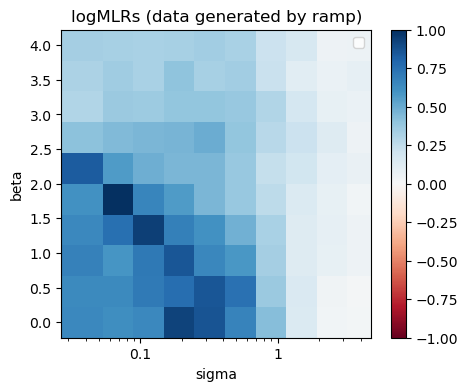

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ave_logMLRs = logMLRs/N

X, Y = np.meshgrid(np.exp(values_logs), values_b)

im = ax.pcolormesh(X, Y, ave_logMLRs, cmap='RdBu', vmin=-1, vmax=1)
ax.set_xscale('log')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

ax.set_title("logMLRs (data generated by ramp)")
ax.set_xlabel("sigma")
ax.set_ylabel("beta")
# plt.xticks(range(M), [1, 25, 50, 75, 100])
# plt.yticks(range(M), [0, 25, 50, 75, 100])
ax.legend()
fig.colorbar(im) #, shrink=0.25) 

print(f"ramp precision: {np.sum(ave_logMLRs > 0)/num_grid**2*100}%, n: {N}")

print(np.average(ramp_MLLs/N))
print(np.average(step_MLLs/N))